In [1]:
import pandas as pd #for working with dataframe
import numpy as np
from scipy import stats, integrate #will help in stats operation in histograms
import matplotlib.pyplot as plt #to plot the PE
import seaborn as sns #nice looking plots
%matplotlib inline
sns.set(color_codes=True)

In [2]:
pd.options.display.max_columns=40

In [3]:
flatdata_adjusted=pd.read_csv('flatdata_adjusted_dupli.csv')
flatdata_adjusted

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE
0,5300.0,NaN,3700,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,58-6231-1663-,6231.0,-1600.0,-30.188679,30.188679
1,7400.0,NaN,5500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,58-6232-1663-,6232.0,-1900.0,-25.675676,25.675676
2,4150.0,NaN,2800,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,58-6233-1663-,6233.0,-1350.0,-32.530120,32.530120
3,3700.0,NaN,2500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,58-6234-1663-,6234.0,-1200.0,-32.432432,32.432432
4,4500.0,NaN,3500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,58-6235-1663-,6235.0,-1000.0,-22.222222,22.222222
5,18800.0,NaN,14000,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,58-6236-2015-,6236.0,-4800.0,-25.531915,25.531915
6,18200.0,NaN,14700,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,58-6237-2015-,6237.0,-3500.0,-19.230769,19.230769
7,19600.0,NaN,16900,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,58-6238-2015-,6238.0,-2700.0,-13.775510,13.775510
8,1300.0,NaN,1900,Washington,1,2007,1.0,8,12,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,58-6239-2126-,6239.0,600.0,46.153846,46.153846
9,1300.0,NaN,1000,Washington,1,2010,1.0,5,12,2486,NaN,NaN,NaN,58,1,1300,2007.0,2010,58-6240-2486-,6240.0,-300.0,-23.076923,23.076923


In [4]:
flatdata_adjusted=flatdata_adjusted.assign(DiffYear=flatdata_adjusted['ForecastYear']-flatdata_adjusted['YearForecastProduced'])

In [5]:
averagecount=flatdata_adjusted['Count'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageCount')
averageforecast=flatdata_adjusted['AdjustedForecast'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageForecast')
improvement_type=flatdata_adjusted['ImprovementType'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='ImprovementType')
forecast_method=flatdata_adjusted['ForecastMethodology'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Forecast_Method')
func_class=flatdata_adjusted['FunctionalClass'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Func_Class')
diff_year=flatdata_adjusted['DiffYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Diff_Year')
#project_error=pd.merge(averagecount,averageforecast,left_on='InternalProjectID')
#project_error
#func_class

In [6]:
flatdata_adjusted_year=flatdata_adjusted[flatdata_adjusted['DiffYear']>=0]
flatdata_adjusted_year

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear
0,5300.0,NaN,3700,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,58-6231-1663-,6231.0,-1600.0,-30.188679,30.188679,3.0
1,7400.0,NaN,5500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,58-6232-1663-,6232.0,-1900.0,-25.675676,25.675676,3.0
2,4150.0,NaN,2800,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,58-6233-1663-,6233.0,-1350.0,-32.530120,32.530120,3.0
3,3700.0,NaN,2500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,58-6234-1663-,6234.0,-1200.0,-32.432432,32.432432,3.0
4,4500.0,NaN,3500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,58-6235-1663-,6235.0,-1000.0,-22.222222,22.222222,3.0
5,18800.0,NaN,14000,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,58-6236-2015-,6236.0,-4800.0,-25.531915,25.531915,2.0
6,18200.0,NaN,14700,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,58-6237-2015-,6237.0,-3500.0,-19.230769,19.230769,2.0
7,19600.0,NaN,16900,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,58-6238-2015-,6238.0,-2700.0,-13.775510,13.775510,2.0
8,1300.0,NaN,1900,Washington,1,2007,1.0,8,12,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,58-6239-2126-,6239.0,600.0,46.153846,46.153846,1.0
9,1300.0,NaN,1000,Washington,1,2010,1.0,5,12,2486,NaN,NaN,NaN,58,1,1300,2007.0,2010,58-6240-2486-,6240.0,-300.0,-23.076923,23.076923,3.0


(-50, 200)

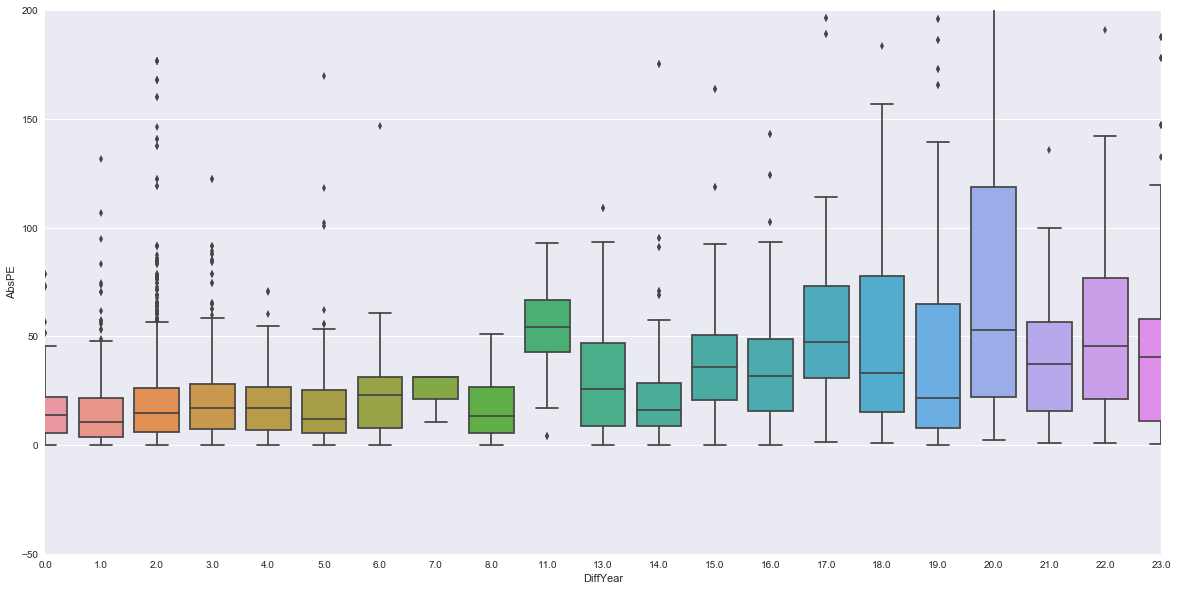

In [7]:
ax=sns.boxplot(flatdata_adjusted_year['DiffYear'],flatdata_adjusted_year['AbsPE'])
ax.figure.set_size_inches(20,10)
ax.set_xlim(0
            ,20)
ax.set_ylim(-50,200)
#ax.figure.savefig('boxplotyear.png')

(-50, 200)

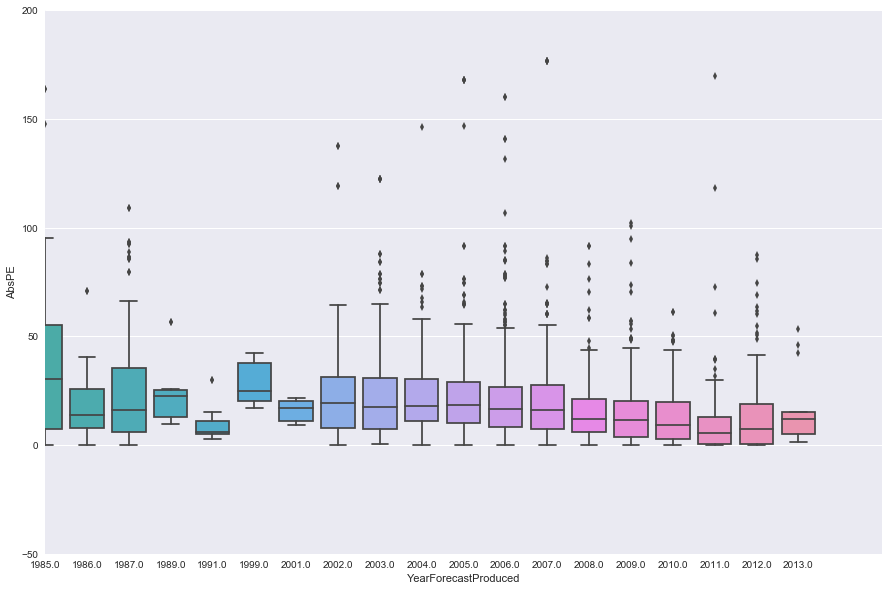

In [8]:
ax=sns.boxplot(flatdata_adjusted_year['YearForecastProduced'],flatdata_adjusted_year['AbsPE'])
ax.figure.set_size_inches(15,10)
ax.set_xlim(20,40)
ax.set_ylim(-50,200)
#ax.figure.savefig('boxplotyearforecastproduced.png')

In [54]:
flatdata_grouped=flatdata_adjusted.groupby(pd.qcut(flatdata_adjusted['TrafficForecast'], 15)).AbsPE.describe()
#grouped statistics of the Absolute Percent Error
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(169.999, 2850.0]",343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464
"(2850.0, 4800.0]",345.0,72.434665,185.619751,0.000000,8.082409,22.500000,56.403270,2142.424242
"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522
"(6900.0, 9000.0]",344.0,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429
"(9000.0, 11370.0]",336.0,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076
"(11370.0, 13800.0]",341.0,36.889722,57.763643,0.000000,7.546553,19.047619,40.615616,392.424242
"(13800.0, 16600.0]",344.0,42.326692,66.185035,0.000000,9.272849,22.455471,42.405063,434.296029
"(16600.0, 19600.0]",347.0,28.026348,34.365323,0.000000,7.736073,16.071429,36.442975,328.985507
"(19600.0, 22466.0]",332.0,33.636729,43.518645,0.000000,8.724220,18.332728,40.353207,262.500000


In [55]:
grouped_2

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(169.999, 2850.0]",343.0,1796.463557,702.650345,170.0,1200.00,1870.0,2400.0,2850.0
"(2850.0, 4800.0]",345.0,3829.947826,577.744902,2860.0,3300.00,3820.0,4330.0,4800.0
"(4800.0, 6900.0]",339.0,5946.032448,598.798201,4810.0,5415.00,5940.0,6500.0,6900.0
"(6900.0, 9000.0]",344.0,8011.933140,611.675612,6910.0,7490.00,8100.0,8500.0,9000.0
"(9000.0, 11370.0]",336.0,10148.187500,671.204218,9010.0,9528.75,10100.0,10700.0,11370.0
"(11370.0, 13800.0]",341.0,12624.615836,714.786650,11400.0,12000.00,12690.0,13220.0,13800.0
"(13800.0, 16600.0]",344.0,15156.325581,812.694137,13840.0,14500.00,15186.5,15800.0,16600.0
"(16600.0, 19600.0]",347.0,18144.054755,864.768057,16650.0,17520.00,18000.0,18990.0,19600.0
"(19600.0, 22466.0]",332.0,21086.936747,822.524703,19650.0,20300.00,21140.0,21900.0,22460.0


In [63]:
flatdata_grouped=pd.read_csv('flatdata_grouped.csv')
flatdata_grouped


,TrafficForecast,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit,Category,Median
0,"(169.999, 2850.0]",343,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.186920,75.967899,"(169.999, 2850.0]",1870
1,"(2850.0, 4800.0]",345,72.434665,185.619750,0.000000,8.082409,22.500000,56.403270,2142.424242,55.995470,88.873860,"(2850.0, 4800.0]",3820
2,"(4800.0, 6900.0]",339,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081,"(4800.0, 6900.0]",5940
3,"(6900.0, 9000.0]",344,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429,27.858519,47.074763,"(6900.0, 9000.0]",8100
4,"(9000.0, 11370.0]",336,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076,22.737832,33.981962,"(9000.0, 11370.0]",10100
5,"(11370.0, 13800.0]",341,36.889722,57.763643,0.000000,7.546553,19.047619,40.615616,392.424242,31.744036,42.035408,"(11370.0, 13800.0]",12690
6,"(13800.0, 16600.0]",344,42.326692,66.185035,0.000000,9.272849,22.455471,42.405063,434.296029,36.456579,48.196806,"(13800.0, 16600.0]",15186
7,"(16600.0, 19600.0]",347,28.026348,34.365323,0.000000,7.736073,16.071429,36.442975,328.985507,24.991607,31.061089,"(16600.0, 19600.0]",18000
8,"(19600.0, 22466.0]",332,33.636728,43.518645,0.000000,8.724220,18.332728,40.353207,262.500000,29.707817,37.565640,"(19600.0, 22466.0]",21140
9,"(22466.0, 26400.0]",345,35.046233,44.249617,0.000000,9.082031,20.086393,46.718147,222.440087,31.127318,38.965148,"(22466.0, 26400.0]",24050


In [64]:
flatdata_grouped=flatdata_grouped.assign(LowerLimit=flatdata_grouped['mean']-1.645*flatdata_grouped['std']/np.sqrt(flatdata_grouped['count']))
flatdata_grouped

,TrafficForecast,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit,Category,Median
0,"(169.999, 2850.0]",343,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.186920,75.967899,"(169.999, 2850.0]",1870
1,"(2850.0, 4800.0]",345,72.434665,185.619750,0.000000,8.082409,22.500000,56.403270,2142.424242,55.995470,88.873860,"(2850.0, 4800.0]",3820
2,"(4800.0, 6900.0]",339,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081,"(4800.0, 6900.0]",5940
3,"(6900.0, 9000.0]",344,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429,27.858519,47.074763,"(6900.0, 9000.0]",8100
4,"(9000.0, 11370.0]",336,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076,22.737832,33.981962,"(9000.0, 11370.0]",10100
5,"(11370.0, 13800.0]",341,36.889722,57.763643,0.000000,7.546553,19.047619,40.615616,392.424242,31.744036,42.035408,"(11370.0, 13800.0]",12690
6,"(13800.0, 16600.0]",344,42.326692,66.185035,0.000000,9.272849,22.455471,42.405063,434.296029,36.456579,48.196806,"(13800.0, 16600.0]",15186
7,"(16600.0, 19600.0]",347,28.026348,34.365323,0.000000,7.736073,16.071429,36.442975,328.985507,24.991607,31.061089,"(16600.0, 19600.0]",18000
8,"(19600.0, 22466.0]",332,33.636728,43.518645,0.000000,8.724220,18.332728,40.353207,262.500000,29.707817,37.565640,"(19600.0, 22466.0]",21140
9,"(22466.0, 26400.0]",345,35.046233,44.249617,0.000000,9.082031,20.086393,46.718147,222.440087,31.127318,38.965148,"(22466.0, 26400.0]",24050


In [65]:
flatdata_grouped=flatdata_grouped.assign(UpperLimit=flatdata_grouped['mean']+1.645*flatdata_grouped['std']/np.sqrt(flatdata_grouped['count']))
flatdata_grouped

,TrafficForecast,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit,Category,Median
0,"(169.999, 2850.0]",343,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.186920,75.967899,"(169.999, 2850.0]",1870
1,"(2850.0, 4800.0]",345,72.434665,185.619750,0.000000,8.082409,22.500000,56.403270,2142.424242,55.995470,88.873860,"(2850.0, 4800.0]",3820
2,"(4800.0, 6900.0]",339,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081,"(4800.0, 6900.0]",5940
3,"(6900.0, 9000.0]",344,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429,27.858519,47.074763,"(6900.0, 9000.0]",8100
4,"(9000.0, 11370.0]",336,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076,22.737832,33.981962,"(9000.0, 11370.0]",10100
5,"(11370.0, 13800.0]",341,36.889722,57.763643,0.000000,7.546553,19.047619,40.615616,392.424242,31.744036,42.035408,"(11370.0, 13800.0]",12690
6,"(13800.0, 16600.0]",344,42.326692,66.185035,0.000000,9.272849,22.455471,42.405063,434.296029,36.456579,48.196806,"(13800.0, 16600.0]",15186
7,"(16600.0, 19600.0]",347,28.026348,34.365323,0.000000,7.736073,16.071429,36.442975,328.985507,24.991607,31.061089,"(16600.0, 19600.0]",18000
8,"(19600.0, 22466.0]",332,33.636728,43.518645,0.000000,8.724220,18.332728,40.353207,262.500000,29.707817,37.565640,"(19600.0, 22466.0]",21140
9,"(22466.0, 26400.0]",345,35.046233,44.249617,0.000000,9.082031,20.086393,46.718147,222.440087,31.127318,38.965148,"(22466.0, 26400.0]",24050


In [46]:
grouped_2=flatdata_adjusted.groupby(pd.qcut(flatdata_adjusted['TrafficForecast'], 15)).TrafficForecast.describe()
grouped_2

,count,mean,std,min,25%,50%,75%,max
TrafficForecast,,,,,,,,
"(169.999, 2850.0]",343.0,1796.463557,702.650345,170.0,1200.00,1870.0,2400.0,2850.0
"(2850.0, 4800.0]",345.0,3829.947826,577.744902,2860.0,3300.00,3820.0,4330.0,4800.0
"(4800.0, 6900.0]",339.0,5946.032448,598.798201,4810.0,5415.00,5940.0,6500.0,6900.0
"(6900.0, 9000.0]",344.0,8011.933140,611.675612,6910.0,7490.00,8100.0,8500.0,9000.0
"(9000.0, 11370.0]",336.0,10148.187500,671.204218,9010.0,9528.75,10100.0,10700.0,11370.0
"(11370.0, 13800.0]",341.0,12624.615836,714.786650,11400.0,12000.00,12690.0,13220.0,13800.0
"(13800.0, 16600.0]",344.0,15156.325581,812.694137,13840.0,14500.00,15186.5,15800.0,16600.0
"(16600.0, 19600.0]",347.0,18144.054755,864.768057,16650.0,17520.00,18000.0,18990.0,19600.0
"(19600.0, 22466.0]",332.0,21086.936747,822.524703,19650.0,20300.00,21140.0,21900.0,22460.0


In [17]:
flatdata_adjusted=flatdata_adjusted.assign(Category=pd.qcut(flatdata_adjusted['TrafficForecast'], 15))
flatdata_adjusted

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear,Category
0,5300.0,NaN,3700,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,58-6231-1663-,6231.0,-1600.0,-30.188679,30.188679,3.0,"(4800.0, 6900.0]"
1,7400.0,NaN,5500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,58-6232-1663-,6232.0,-1900.0,-25.675676,25.675676,3.0,"(6900.0, 9000.0]"
2,4150.0,NaN,2800,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,58-6233-1663-,6233.0,-1350.0,-32.530120,32.530120,3.0,"(2850.0, 4800.0]"
3,3700.0,NaN,2500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,58-6234-1663-,6234.0,-1200.0,-32.432432,32.432432,3.0,"(2850.0, 4800.0]"
4,4500.0,NaN,3500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,58-6235-1663-,6235.0,-1000.0,-22.222222,22.222222,3.0,"(2850.0, 4800.0]"
5,18800.0,NaN,14000,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,58-6236-2015-,6236.0,-4800.0,-25.531915,25.531915,2.0,"(16600.0, 19600.0]"
6,18200.0,NaN,14700,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,58-6237-2015-,6237.0,-3500.0,-19.230769,19.230769,2.0,"(16600.0, 19600.0]"
7,19600.0,NaN,16900,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,58-6238-2015-,6238.0,-2700.0,-13.775510,13.775510,2.0,"(16600.0, 19600.0]"
8,1300.0,NaN,1900,Washington,1,2007,1.0,8,12,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,58-6239-2126-,6239.0,600.0,46.153846,46.153846,1.0,"(169.999, 2850.0]"
9,1300.0,NaN,1000,Washington,1,2010,1.0,5,12,2486,NaN,NaN,NaN,58,1,1300,2007.0,2010,58-6240-2486-,6240.0,-300.0,-23.076923,23.076923,3.0,"(169.999, 2850.0]"


In [66]:
flatdata_adjusted

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear,Category
0,5300.0,NaN,3700,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,58-6231-1663-,6231.0,-1600.0,-30.188679,30.188679,3.0,"(4800.0, 6900.0]"
1,7400.0,NaN,5500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,58-6232-1663-,6232.0,-1900.0,-25.675676,25.675676,3.0,"(6900.0, 9000.0]"
2,4150.0,NaN,2800,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,58-6233-1663-,6233.0,-1350.0,-32.530120,32.530120,3.0,"(2850.0, 4800.0]"
3,3700.0,NaN,2500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,58-6234-1663-,6234.0,-1200.0,-32.432432,32.432432,3.0,"(2850.0, 4800.0]"
4,4500.0,NaN,3500,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,58-6235-1663-,6235.0,-1000.0,-22.222222,22.222222,3.0,"(2850.0, 4800.0]"
5,18800.0,NaN,14000,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,58-6236-2015-,6236.0,-4800.0,-25.531915,25.531915,2.0,"(16600.0, 19600.0]"
6,18200.0,NaN,14700,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,58-6237-2015-,6237.0,-3500.0,-19.230769,19.230769,2.0,"(16600.0, 19600.0]"
7,19600.0,NaN,16900,Washington,1,2007,1.0,4,12,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,58-6238-2015-,6238.0,-2700.0,-13.775510,13.775510,2.0,"(16600.0, 19600.0]"
8,1300.0,NaN,1900,Washington,1,2007,1.0,8,12,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,58-6239-2126-,6239.0,600.0,46.153846,46.153846,1.0,"(169.999, 2850.0]"
9,1300.0,NaN,1000,Washington,1,2010,1.0,5,12,2486,NaN,NaN,NaN,58,1,1300,2007.0,2010,58-6240-2486-,6240.0,-300.0,-23.076923,23.076923,3.0,"(169.999, 2850.0]"


In [67]:
flatdata_grouped= flatdata_grouped.rename(index=str, columns={'TrafficForecast':'Category'})
flatdata_grouped

,Category,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit,Category,Median
0,"(169.999, 2850.0]",343,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.186920,75.967899,"(169.999, 2850.0]",1870
1,"(2850.0, 4800.0]",345,72.434665,185.619750,0.000000,8.082409,22.500000,56.403270,2142.424242,55.995470,88.873860,"(2850.0, 4800.0]",3820
2,"(4800.0, 6900.0]",339,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081,"(4800.0, 6900.0]",5940
3,"(6900.0, 9000.0]",344,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429,27.858519,47.074763,"(6900.0, 9000.0]",8100
4,"(9000.0, 11370.0]",336,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076,22.737832,33.981962,"(9000.0, 11370.0]",10100
5,"(11370.0, 13800.0]",341,36.889722,57.763643,0.000000,7.546553,19.047619,40.615616,392.424242,31.744036,42.035408,"(11370.0, 13800.0]",12690
6,"(13800.0, 16600.0]",344,42.326692,66.185035,0.000000,9.272849,22.455471,42.405063,434.296029,36.456579,48.196806,"(13800.0, 16600.0]",15186
7,"(16600.0, 19600.0]",347,28.026348,34.365323,0.000000,7.736073,16.071429,36.442975,328.985507,24.991607,31.061089,"(16600.0, 19600.0]",18000
8,"(19600.0, 22466.0]",332,33.636728,43.518645,0.000000,8.724220,18.332728,40.353207,262.500000,29.707817,37.565640,"(19600.0, 22466.0]",21140
9,"(22466.0, 26400.0]",345,35.046233,44.249617,0.000000,9.082031,20.086393,46.718147,222.440087,31.127318,38.965148,"(22466.0, 26400.0]",24050


In [24]:
flatdata_grouped=flatdata_grouped.assign(Category=flatdata_grouped.index)
flatdata_grouped

,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit,Category
TrafficForecast,,,,,,,,,,,
"(169.999, 2850.0]",343.0,59.577410,184.532592,0.000000,7.217021,16.279070,39.189257,1755.072464,43.186920,75.967899,"(169.999, 2850.0]"
"(2850.0, 4800.0]",345.0,72.434665,185.619751,0.000000,8.082409,22.500000,56.403270,2142.424242,55.995470,88.873860,"(2850.0, 4800.0]"
"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.000000,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081,"(4800.0, 6900.0]"
"(6900.0, 9000.0]",344.0,37.466641,108.330773,0.000000,7.988636,18.087847,35.714286,1328.571429,27.858519,47.074763,"(6900.0, 9000.0]"
"(9000.0, 11370.0]",336.0,28.359897,62.646904,0.000000,8.664117,20.088056,37.300532,1096.781076,22.737832,33.981962,"(9000.0, 11370.0]"
"(11370.0, 13800.0]",341.0,36.889722,57.763643,0.000000,7.546553,19.047619,40.615616,392.424242,31.744036,42.035408,"(11370.0, 13800.0]"
"(13800.0, 16600.0]",344.0,42.326692,66.185035,0.000000,9.272849,22.455471,42.405063,434.296029,36.456579,48.196806,"(13800.0, 16600.0]"
"(16600.0, 19600.0]",347.0,28.026348,34.365323,0.000000,7.736073,16.071429,36.442975,328.985507,24.991607,31.061089,"(16600.0, 19600.0]"
"(19600.0, 22466.0]",332.0,33.636729,43.518645,0.000000,8.724220,18.332728,40.353207,262.500000,29.707817,37.565640,"(19600.0, 22466.0]"


In [38]:
flatdata_grouped.to_csv('flatdata_grouped.csv')

In [25]:
df=pd.merge(flatdata_adjusted,flatdata_grouped)
df

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,Error,PercentError,AbsPE,DiffYear,Category,count,mean,std,min,25%,50%,75%,max,LowerLimit,UpperLimit
0,5300.0,NaN,3700,Washington,1,2010,1.0,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,58-6231-1663-,6231.0,-1600.0,-30.188679,30.188679,3.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
1,6400.0,NaN,6700,Washington,1,2007,1.0,3,12,2126,NaN,NaN,NaN,58,1,6400,2006.0,2007,58-6245-2126-,6245.0,300.0,4.687500,4.687500,1.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
2,5350.0,NaN,5400,Waukesha,1,2009,1.0,4,12,1745,NaN,NaN,NaN,58,1,5350,2007.0,2009,58-6255-1745-,6255.0,50.0,0.934579,0.934579,2.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
3,5200.0,NaN,5500,Waukesha,1,2009,1.0,4,12,2577,NaN,NaN,NaN,58,1,5200,2007.0,2009,58-6281-2577-,6281.0,300.0,5.769231,5.769231,2.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
4,6900.0,NaN,6200,Racine,1,2008,1.0,3,12,2217,NaN,NaN,NaN,58,1,6900,2006.0,2008,58-6313-2217-,6313.0,-700.0,-10.144928,10.144928,2.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
5,5600.0,NaN,5200,Racine,1,2008,1.0,3,12,2217,NaN,NaN,NaN,58,1,5600,2006.0,2008,58-6316-2217-,6316.0,-400.0,-7.142857,7.142857,2.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
6,6700.0,NaN,5300,Walworth,1,2009,1.0,3,12,2533,NaN,NaN,NaN,58,1,6700,2007.0,2009,58-6324-2533-,6324.0,-1400.0,-20.895522,20.895522,2.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
7,6200.0,NaN,5400,Walworth,1,2009,1.0,3,12,2533,NaN,NaN,NaN,58,1,6200,2007.0,2009,58-6328-2533-,6328.0,-800.0,-12.903226,12.903226,2.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
8,6900.0,NaN,3800,Brown,4,2009,1.0,8,12,1929,NaN,NaN,NaN,58,1,6900,2005.0,2009,58-6351-1929-,6351.0,-3100.0,-44.927536,44.927536,4.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081
9,6000.0,NaN,4200,Brown,4,2009,1.0,8,12,1929,NaN,NaN,NaN,58,1,6000,2005.0,2009,58-6365-1929-,6365.0,-1800.0,-30.000000,30.000000,4.0,"(4800.0, 6900.0]",339.0,45.253134,117.981410,0.0,10.745415,20.204153,39.410700,1186.956522,34.712187,55.794081


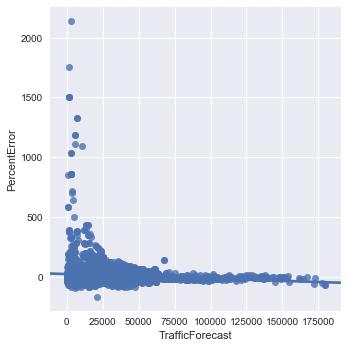

In [31]:
sns.lmplot(x="TrafficForecast", y="PercentError", data=df)

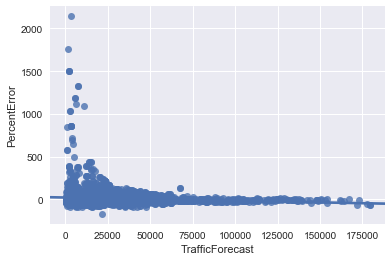

In [37]:
sns.regplot(x="TrafficForecast", y="PercentError", data=df)


TrafficForecast
(169.999, 2850.0]       1870.0
(2850.0, 4800.0]        3820.0
(4800.0, 6900.0]        5940.0
(6900.0, 9000.0]        8100.0
(9000.0, 11370.0]      10100.0
(11370.0, 13800.0]     12690.0
(13800.0, 16600.0]     15186.5
(16600.0, 19600.0]     18000.0
(19600.0, 22466.0]     21140.0
(22466.0, 26400.0]     24050.0
(26400.0, 31500.0]     28930.0
(31500.0, 38000.0]     34900.0
(38000.0, 46750.0]     41500.0
(46750.0, 59250.0]     51840.0
(59250.0, 179400.0]    82220.0
Name: TrafficForecast, dtype: float64